# **Stochastic & Mini Batch Gradient Descent**


## Part 1 - Getting Started

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

In [ ]:
df.head()

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.0,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006


In [ ]:
y = df['Goal']

In [ ]:
X = df.drop(labels='Goal', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split       
X_train, X_new, y_train, y_new = train_test_split(X,y, test_size=0.3, random_state=1)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_new,y_new, test_size=0.5, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
X_val = std.transform(X_val)

In [ ]:
X_val

array([[-0.01150739,  0.17705531, -0.41602559, ...,  0.01177061,
        -0.62878591, -0.43259795],
       [ 1.39064604,  1.4919319 , -0.74551183, ...,  0.01177061,
        -0.62878591, -0.28823365],
       [-0.89505612, -0.48038298, -1.00910082, ...,  0.01177061,
        -0.62878591, -0.72132656],
       ...,
       [-0.41870811, -1.36985832,  1.09961112, ...,  0.01177061,
        -0.11802007, -0.28823365],
       [-0.46096479,  0.6411294 ,  1.13255974, ...,  0.01177061,
        -0.62878591, -0.57696225],
       [-0.17285107, -0.51905582, -0.7125632 , ...,  0.01177061,
        -0.62878591, -0.72132656]])

In [ ]:
X_train = np.insert(X_train, 0, 1, axis=1)
X_val = np.insert(X_val, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

Epoch is each time the model sees(learns) the whole dataset.In Mini Batch Gradient Descent, one epoch is equal to the number of batches and the weight update (iteration) takes place for every batch. Whereas, in SGD one epochs is equal to the number of samples and the weight update takes place for every sample. 


## Part 2 - Linear Regression Using Direct Solution

In [ ]:
import scipy
def direct_solution(x,y):
  print((np.dot(x.T,x).shape))
  n = scipy.linalg.inv(np.dot(x.T, x))
  W = np.dot(n, np.dot(x.T, y))
  yPred = np.dot(x, W)
  return W,yPred

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [ ]:
W, yPred = direct_solution(X_train,y_train)
rmse_train = rmse(yPred,y_train)
print(rmse_train)

yPred_val = np.dot(X_val,W)
rmse_val = rmse(yPred_val,y_val)
yPred_test = np.dot(X_test,W)
rmse_test = rmse(yPred_test,y_test)
print('RMSE Train: ', round(rmse_train, 6))
print('RMSE Validation: ', round(rmse_val, 8))

(41, 41)
0.00017529314691535266
RMSE Train:  0.000175
RMSE Validation:  0.00016699


## Part 3 - Full Batch Gradient Descent

In [ ]:
X_train

array([[ 1.        , -0.36108536, -0.90578423, ...,  0.01177061,
        -0.62878591, -0.72132656],
       [ 1.        , -0.99493554, -1.36985832, ...,  0.01177061,
         0.39274576,  0.57795218],
       [ 1.        , -1.1255471 ,  0.17705531, ...,  0.01177061,
        -0.11802007, -0.28823365],
       ...,
       [ 1.        ,  0.10757962,  1.76264179, ...,  0.01177061,
         0.39274576,  0.43358788],
       [ 1.        ,  1.49436698,  0.91183929, ...,  0.01177061,
        -0.62878591, -0.72132656],
       [ 1.        , -0.59541786, -0.20967309, ...,  0.01177061,
        -0.62878591, -0.57696225]])

In [ ]:

def full_batchGD(X_tr,t_tr,X_val,t_val,w,lr,rmse_val):
  start_time = time.time() 
  rmse_tr=[]
  rmse_v =[]
  th = 0
  i = 1
  while(th == 0): 
    t_tr = np.array(t_tr)
    t_tr = t_tr.reshape(-1,1)
    t_val = np.array(t_val)
    t_val = t_val.reshape(-1,1)
    y_tr = np.dot(X_tr,w).reshape(-1,1)
    y_val = np.dot(X_val,w).reshape(-1,1)
    rmse_tr.append(rmse(y_tr,t_tr))
    rmse_v.append(rmse(y_val,t_val))
    gradient = (1/len(y_tr) * np.dot(X_tr.T, y_tr-t_tr))
    w = w - lr * gradient
    i = i+1
    if (i %1000) == 0:
      print('RMSE Validation {} epoch: '.format(i),round(rmse_v[-1],8))
    if rmse_v[-1] <= (1.001*rmse_val):
      print('epoch:',i)
      th = 1
  print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
  return i,rmse_tr,rmse_v

In [ ]:
w = (np.random.random(41)*0.0001).reshape(-1,1)
lr = 0.01
epoch, rmse_tr,rmse_v = full_batchGD(X_train,y_train,X_val,y_val,w,lr,rmse_val)

RMSE Validation 1000 epoch:  0.00016857
RMSE Validation 2000 epoch:  0.00016746
RMSE Validation 3000 epoch:  0.00016732
RMSE Validation 4000 epoch:  0.00016725
RMSE Validation 5000 epoch:  0.00016721
RMSE Validation 6000 epoch:  0.00016719
RMSE Validation 7000 epoch:  0.00016717
RMSE Validation 8000 epoch:  0.00016716
epoch: 8176
--- Total Training Time: 7.606614112854004 (s) ---


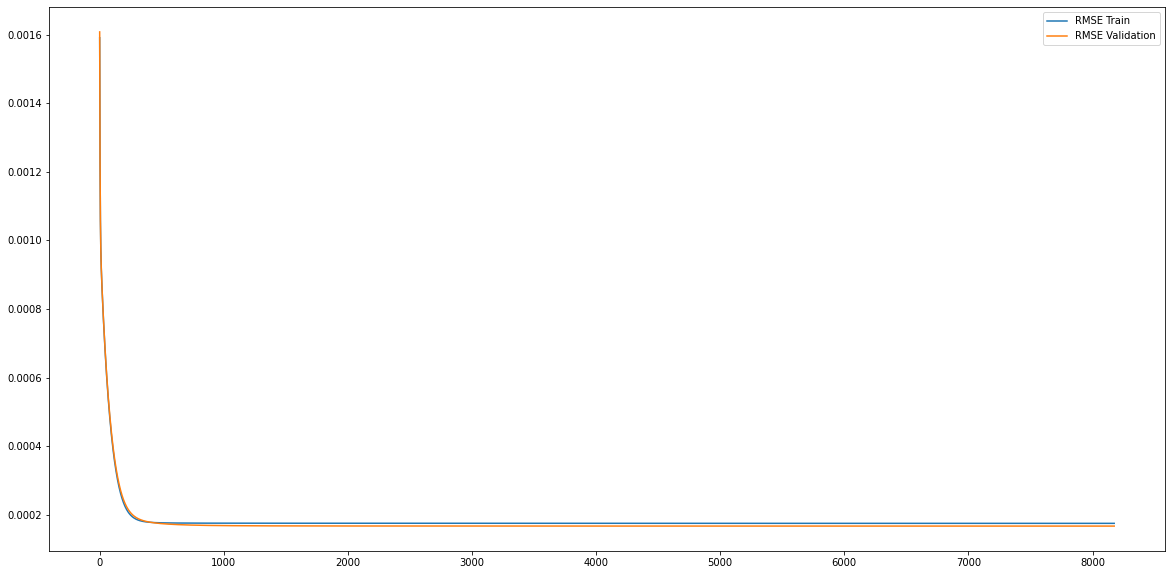

In [ ]:
epoch_list = list(range(1,epoch))
plt.figure(figsize=(20,10))
plt.plot(epoch_list,rmse_tr,label="RMSE Train")
plt.plot(epoch_list,rmse_v,label="RMSE Validation")
plt.legend()
plt.show()

In [ ]:
print('RMSE Train: ', round(rmse_tr[-1], 6))
print('RMSE Validation: ', round(rmse_v[-1], 6))

RMSE Train:  0.000175
RMSE Validation:  0.000167


Because of the use of small values (<0.001) for weight initilization the Validation RMSE is lower than the Training RMSE. Based on analysis of the training and validation set RMSE, the model is neither underfitting nor overfitting.

Overfitting happens when the validation loss first decreases, becomes almost equal to the training loss and then gradually increases again.

Underfitting happens when the validation loss is almost always higher than the training loss for the entire duration of the training. This model fits the data almost perfectly.




## Part 4 - Mini-batch and Stochastic Gradient Descent

In [ ]:
def create_mini_batches(data, batch_size):
    mini_batches = []
    n_minibatches = data.shape[0] // batch_size
    i = 0
    num = n_minibatches + 1
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches, num

In [ ]:
def mini_batchGD(X_tr,t_tr,X_val,t_val,w,lr,rmse_val,batch_size):
  start_time = time.time() 
  rmse_tr=[]
  rmse_v =[2]
  time_arr = []
  th = 0
  epoch = 1
  while(th==0):
    ind_list = [i for i in range(len(X_tr))]
    ind_list = np.random.permutation(ind_list)
    X_tr = X_tr[ind_list]
    t_tr = np.array(t_tr)
    t_tr = t_tr.reshape(-1,1)
    t_tr = t_tr[ind_list]
    tr_data = np.hstack((X_tr,t_tr))
    mini_batches, num = create_mini_batches(tr_data,batch_size)
    t_val = np.array(t_val)
    t_val = t_val.reshape(-1,1)

    for mini_batch in mini_batches:
      X_mini, t_mini = mini_batch
      y_tr = np.dot(X_mini,w).reshape(-1,1)
      y_val = np.dot(X_val,w).reshape(-1,1)
      gradient = (1/len(y_tr) * np.dot(X_mini.T, y_tr-t_mini))
      w = w - lr * gradient
      if rmse_v[-1] <= (1.001*rmse_val):
        print('epoch:',epoch)
        th = 1
        break
      # if (epoch % 100) == 0:
      #   th = 1
      #   break
    epoch = epoch+1
    rmse_tr.append(rmse(y_tr,t_mini))
    rmse_v.append(rmse(y_val,t_val))
    if (epoch %10) == 0:
      print('RMSE Validation {} epoch: '.format(epoch),round(rmse_v[-1],8))
    time_arr.append(time.time()-start_time)
  print('Number of Batches(iterations/epoch):',num)
  print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
  epoch = epoch - 1
  rmse_v = rmse_v[1:]
  return w,epoch,rmse_tr,rmse_v, time_arr,num


In [ ]:
w = (np.random.random(41)*0.0001).reshape(-1,1)
lr = 0.01
batch_size =64
final_w1,epoch1, rmse_tr1,rmse_v1,time_arr1,itr1 = mini_batchGD(X_train,y_train,X_val,y_val,w,lr,rmse_val,batch_size)

RMSE Validation 10 epoch:  0.00018341
epoch: 18
Number of Batches(iterations/epoch): 151
--- Total Training Time: 0.2986178398132324 (s) ---


In [ ]:
w = (np.random.random(41)*0.0001).reshape(-1,1)
lr = 0.01
batch_size =128
final_w,epoch, rmse_tr,rmse_v,time_arr,itr = mini_batchGD(X_train,y_train,X_val,y_val,w,lr,rmse_val,batch_size)

RMSE Validation 10 epoch:  0.00016939
RMSE Validation 20 epoch:  0.00016754
RMSE Validation 30 epoch:  0.00016748
RMSE Validation 40 epoch:  0.00016759
RMSE Validation 50 epoch:  0.00016738
RMSE Validation 60 epoch:  0.00016833
RMSE Validation 70 epoch:  0.00016719
RMSE Validation 80 epoch:  0.0001675
RMSE Validation 90 epoch:  0.00016727
RMSE Validation 100 epoch:  0.00016834
RMSE Validation 110 epoch:  0.00016732
RMSE Validation 120 epoch:  0.00016768
epoch: 124
Number of Batches(iterations/epoch): 76
--- Total Training Time: 1.6759650707244873 (s) ---


In [ ]:
w = (np.random.random(41)*0.0001).reshape(-1,1)
lr = 0.01
batch_size =256
final_w2,epoch2, rmse_tr2,rmse_v2,time_arr2,itr2 = mini_batchGD(X_train,y_train,X_val,y_val,w,lr,rmse_val,batch_size)

RMSE Validation 10 epoch:  0.00017423
RMSE Validation 20 epoch:  0.00016798
RMSE Validation 30 epoch:  0.0001674
RMSE Validation 40 epoch:  0.00016708
epoch: 40
Number of Batches(iterations/epoch): 38
--- Total Training Time: 0.47806596755981445 (s) ---


In [ ]:
w = (np.random.random(41)*0.0001).reshape(-1,1)
lr = 0.01
batch_size =512
final_w3,epoch3, rmse_tr3,rmse_v3,time_arr3,itr3 = mini_batchGD(X_train,y_train,X_val,y_val,w,lr,rmse_val,batch_size)

RMSE Validation 10 epoch:  0.0002535
RMSE Validation 20 epoch:  0.00017755
RMSE Validation 30 epoch:  0.00017079
RMSE Validation 40 epoch:  0.00016894
RMSE Validation 50 epoch:  0.00016822
RMSE Validation 60 epoch:  0.00016785
RMSE Validation 70 epoch:  0.00016756
RMSE Validation 80 epoch:  0.00016792
RMSE Validation 90 epoch:  0.00016738
RMSE Validation 100 epoch:  0.00016736
RMSE Validation 110 epoch:  0.00016734
RMSE Validation 120 epoch:  0.0001673
RMSE Validation 130 epoch:  0.00016725
RMSE Validation 140 epoch:  0.00016723
RMSE Validation 150 epoch:  0.00016724
RMSE Validation 160 epoch:  0.00016733
RMSE Validation 170 epoch:  0.00016722
RMSE Validation 180 epoch:  0.00016731
epoch: 185
Number of Batches(iterations/epoch): 19
--- Total Training Time: 2.9421210289001465 (s) ---


In [ ]:
w = (np.random.random(41)*0.0001).reshape(-1,1)
lr = 0.01
batch_size =1024
final_w4,epoch4, rmse_tr4,rmse_v4,time_arr4,itr4 = mini_batchGD(X_train,y_train,X_val,y_val,w,lr,rmse_val,batch_size)

RMSE Validation 10 epoch:  0.00040066
RMSE Validation 20 epoch:  0.00021595
RMSE Validation 30 epoch:  0.00018109
RMSE Validation 40 epoch:  0.00017301
RMSE Validation 50 epoch:  0.00017117
RMSE Validation 60 epoch:  0.00017001
RMSE Validation 70 epoch:  0.00016898
RMSE Validation 80 epoch:  0.00016853
RMSE Validation 90 epoch:  0.00016834
RMSE Validation 100 epoch:  0.00016785
RMSE Validation 110 epoch:  0.00016774
RMSE Validation 120 epoch:  0.00016757
RMSE Validation 130 epoch:  0.00016756
RMSE Validation 140 epoch:  0.00016746
RMSE Validation 150 epoch:  0.00016747
RMSE Validation 160 epoch:  0.00016745
RMSE Validation 170 epoch:  0.00016741
RMSE Validation 180 epoch:  0.00016731
RMSE Validation 190 epoch:  0.00016727
RMSE Validation 200 epoch:  0.00016754
RMSE Validation 210 epoch:  0.00016728
RMSE Validation 220 epoch:  0.00016726
RMSE Validation 230 epoch:  0.00016724
RMSE Validation 240 epoch:  0.00016723
RMSE Validation 250 epoch:  0.00016721
RMSE Validation 260 epoch:  0.0001

In [ ]:
epoch_list = list(range(0,len(rmse_tr1)))
epoch_list1 = list(range(0,len(rmse_tr)))
epoch_list2 = list(range(0,len(rmse_tr2)))
epoch_list3 = list(range(0,len(rmse_tr3)))
epoch_list4 = list(range(0,len(rmse_tr4)))
epoch_ = [epoch_list,epoch_list1,epoch_list2,epoch_list3,epoch_list4]
rmse_train = [rmse_tr1,rmse_tr,rmse_tr2, rmse_tr3, rmse_tr4]
rmse_valid = [rmse_v1,rmse_v,rmse_v2, rmse_v3, rmse_v4]
batch_s = [64,128,256,512,1024]

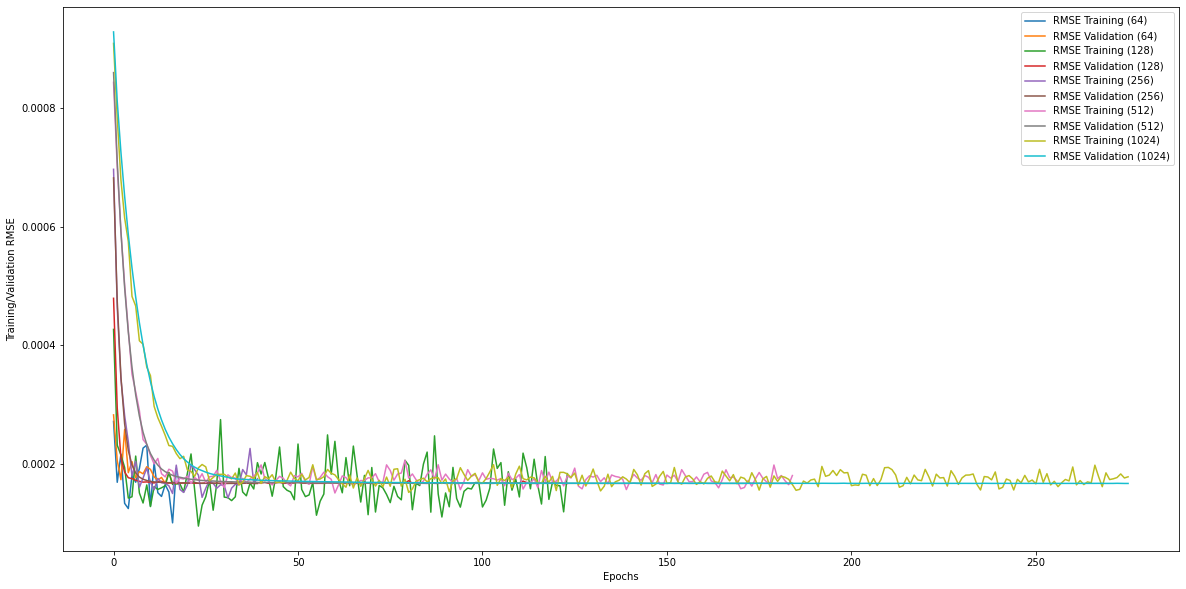

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(5):
  plt.plot(epoch_[i],rmse_train[i],label="RMSE Training ({})".format(batch_s[i]))
  plt.plot(epoch_[i],rmse_valid[i],label="RMSE Validation ({})".format(batch_s[i]))
plt.xlabel('Epochs')
plt.ylabel('Training/Validation RMSE')
plt.legend()
plt.show()

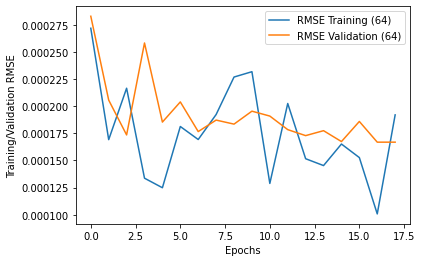

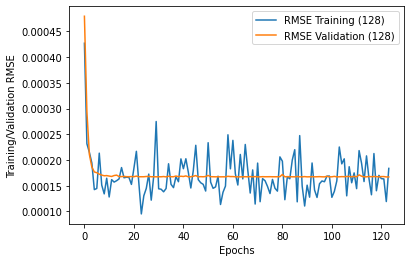

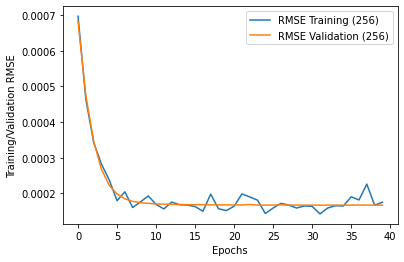

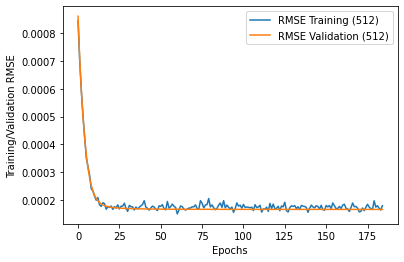

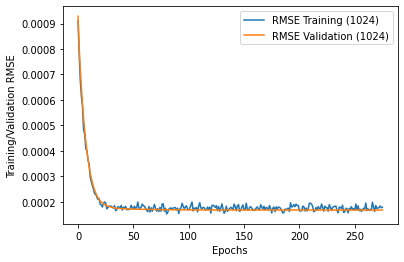

In [ ]:
for i in range(5):
  plt.plot(epoch_[i],rmse_train[i],label="RMSE Training ({})".format(batch_s[i]))
  plt.plot(epoch_[i],rmse_valid[i],label="RMSE Validation ({})".format(batch_s[i]))
  plt.xlabel('Epochs')
  plt.ylabel('Training/Validation RMSE')
  plt.legend()
  plt.show()

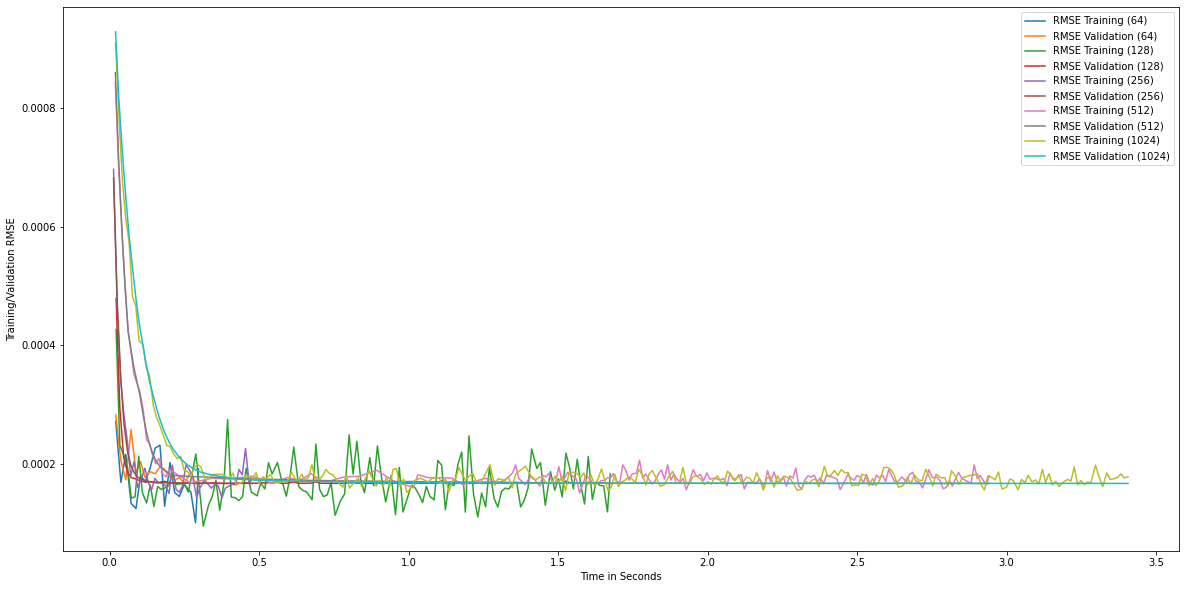

In [ ]:
time_array = [time_arr1,time_arr,time_arr2,time_arr3,time_arr4]
plt.figure(figsize=(20, 10))
for i in range(5):
  plt.plot(time_array[i],rmse_train[i],label="RMSE Training ({})".format(batch_s[i]))
  plt.plot(time_array[i],rmse_valid[i],label="RMSE Validation ({})".format(batch_s[i]))
plt.xlabel('Time in Seconds')
plt.ylabel('Training/Validation RMSE')
plt.legend()
plt.show()

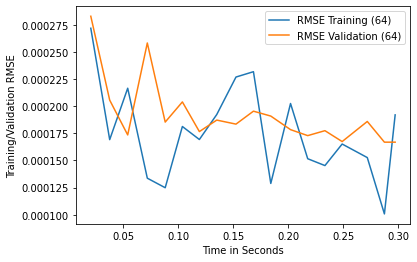

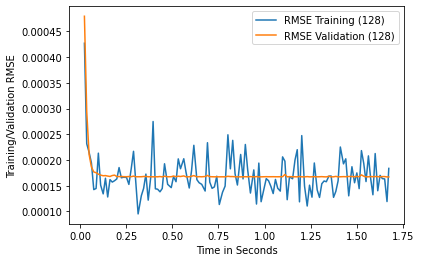

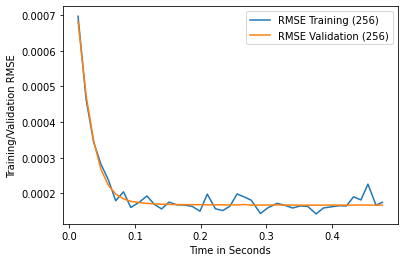

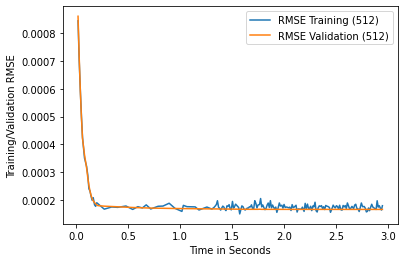

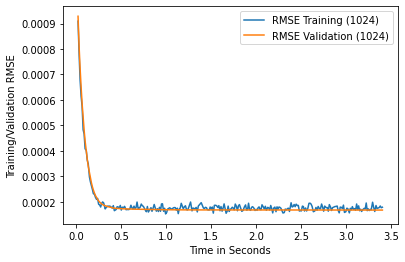

In [ ]:
for i in range(5):
  plt.plot(time_array[i],rmse_train[i],label="RMSE Training ({})".format(batch_s[i]))
  plt.plot(time_array[i],rmse_valid[i],label="RMSE Validation ({})".format(batch_s[i]))
  plt.xlabel('Time in Seconds')
  plt.ylabel('Training/Validation RMSE')
  plt.legend()
  plt.show()

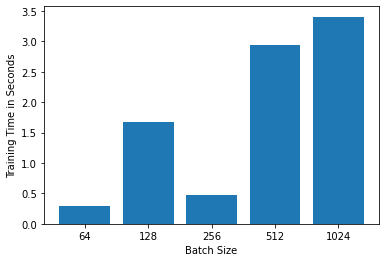

In [ ]:
data = {'64': time_arr1[-1], '128': time_arr[-1], '256': time_arr2[-1], '512': time_arr3[-1], '1024':time_arr4[-1]}
names = list(data.keys())
values = list(data.values())
plt.bar(names, values)
plt.xlabel("Batch Size")
plt.ylabel("Training Time in Seconds")
plt.show()

  From the first and second graph we can observe that the Training RMSE is not smooth whereas the Validation RMSE is smooth. This is because of the fact that we train our model with mini batches of data. Although we shuffle the training set after each epoch, the data in the mini batch can still be biased which leads to the spikes.
  
  From the third graph, we can also observe that the models with larger batch size takes more time to converge compared to models with smaller batch size.

## Part 5 - Gradient Descent Learning Rate


The batch sizes of 32,16 and 8 did not converge with the learning rate of 0.01.

In [ ]:
w = (np.random.random(41)*0.0001).reshape(-1,1)
lr = 0.001
batch_size =32
final_w5,epoch5, rmse_tr5,rmse_v5,time_arr5,itr5 = mini_batchGD(X_train,y_train,X_val,y_val,w,lr,rmse_val,batch_size)

RMSE Validation 10 epoch:  0.00018689
RMSE Validation 20 epoch:  0.00016862
RMSE Validation 30 epoch:  0.00016771
RMSE Validation 40 epoch:  0.00016738
RMSE Validation 50 epoch:  0.00016738
RMSE Validation 60 epoch:  0.00016725
RMSE Validation 70 epoch:  0.00016719
epoch: 71
Number of Batches(iterations/epoch): 301
--- Total Training Time: 1.6630222797393799 (s) ---


In [ ]:
w = (np.random.random(41)*0.0001).reshape(-1,1)
lr = 0.001
batch_size =16
final_w6,epoch6, rmse_tr6,rmse_v6,time_arr6,itr6 = mini_batchGD(X_train,y_train,X_val,y_val,w,lr,rmse_val,batch_size)

RMSE Validation 10 epoch:  0.00017301
RMSE Validation 20 epoch:  0.00016806
RMSE Validation 30 epoch:  0.00016741
RMSE Validation 40 epoch:  0.00016804
RMSE Validation 50 epoch:  0.00016729
RMSE Validation 60 epoch:  0.00016728
epoch: 65
Number of Batches(iterations/epoch): 602
--- Total Training Time: 4.876228094100952 (s) ---


In [ ]:
w = (np.random.random(41)*0.0001).reshape(-1,1)
lr = 0.001
batch_size =8
final_w7,epoch7, rmse_tr7,rmse_v7,time_arr7,itr7 = mini_batchGD(X_train,y_train,X_val,y_val,w,lr,rmse_val,batch_size)

RMSE Validation 10 epoch:  0.00016684
epoch: 10
Number of Batches(iterations/epoch): 1204
--- Total Training Time: 2.2297918796539307 (s) ---


The batch sizes of 32,16 and 8 converged with the learning rate of 0.001

In [ ]:
batch = [32,16,8]
learning_rate = [0.001,0.001,0.001]
training_rmse = [rmse_tr5[-1],rmse_tr6[-1],rmse_tr7[-1]]
val_rmse = [rmse_v5[-1],rmse_v6[-1],rmse_v7[-1]]
tar = [time_arr5[-1],time_arr6[-1],time_arr7[-1]]
table = pd.DataFrame()
table['Batch Size'] = batch
table['Learning Rate'] = learning_rate
table['Training RMSE'] = training_rmse
table['Validation RMSE'] = val_rmse
table['Time Elapsed (Seconds)'] = tar

In [ ]:
table.head()

,Batch Size,Learning Rate,Training RMSE,Validation RMSE,Time Elapsed (Seconds)
0,32,0.001,0.000154,0.000167,1.661785
1,16,0.001,0.000125,0.000167,4.876116
2,8,0.001,0.000079,0.000167,2.228785


In [ ]:
lr = [0.01,0.007,0.008,0.009,0.005,0.002,0.001,0.006,0.004,0.003]
ep = []
rm_tr = []
rm_v = []
tm_ar = []
for item in lr:
  w = (np.random.random(41)*0.0001).reshape(-1,1)
  batch_size =64
  final_w8,epoch8, rmse_tr8,rmse_v8,time_arr8,itr8 = mini_batchGD(X_train,y_train,X_val,y_val,w,item,rmse_val,batch_size)
  rm_tr.append(rmse_tr8)
  rm_v.append(rmse_v8)
  ep.append(epoch8)
  tm_ar.append(time_arr8)

RMSE Validation 10 epoch:  0.00017431
RMSE Validation 20 epoch:  0.00016762
epoch: 22
Number of Batches(iterations/epoch): 151
--- Total Training Time: 0.36039304733276367 (s) ---
RMSE Validation 10 epoch:  0.00016809
RMSE Validation 20 epoch:  0.00016812
RMSE Validation 30 epoch:  0.00016756
epoch: 37
Number of Batches(iterations/epoch): 151
--- Total Training Time: 0.6384255886077881 (s) ---
RMSE Validation 10 epoch:  0.00016763
epoch: 12
Number of Batches(iterations/epoch): 151
--- Total Training Time: 0.1971137523651123 (s) ---
RMSE Validation 10 epoch:  0.00016742
RMSE Validation 20 epoch:  0.00016751
epoch: 28
Number of Batches(iterations/epoch): 151
--- Total Training Time: 0.4528484344482422 (s) ---
RMSE Validation 10 epoch:  0.00017049
RMSE Validation 20 epoch:  0.0001679
RMSE Validation 30 epoch:  0.00016757
RMSE Validation 40 epoch:  0.00016753
RMSE Validation 50 epoch:  0.00016756
RMSE Validation 60 epoch:  0.0001678
RMSE Validation 70 epoch:  0.00016743
RMSE Validation 80 

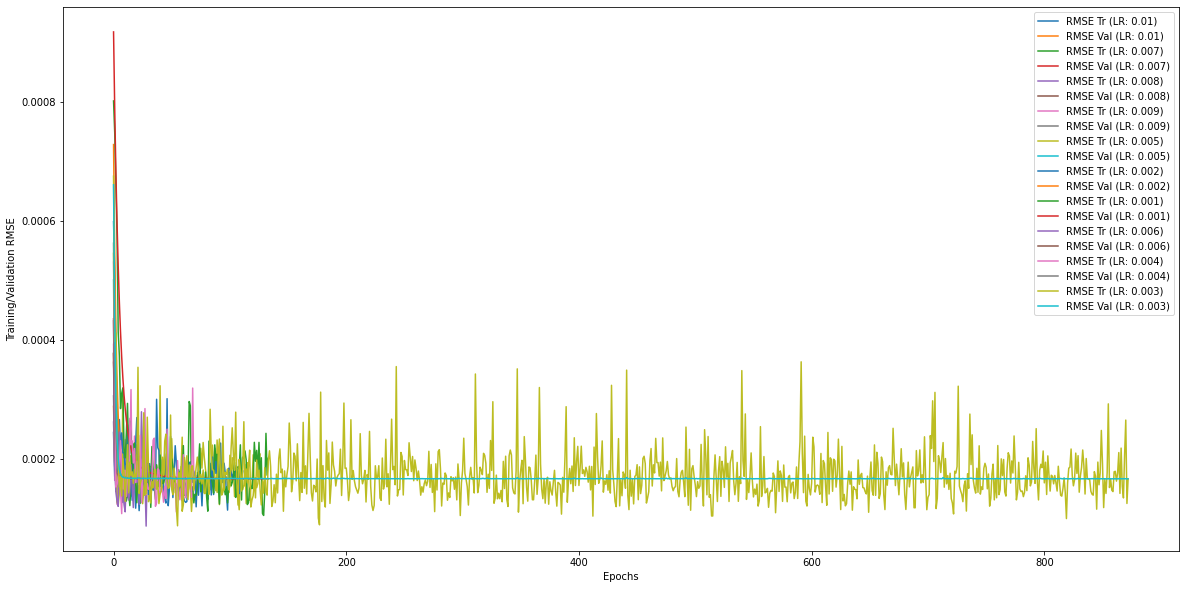

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(ep)):
  plt.plot(list(range(0,ep[i])),rm_tr[i],label="RMSE Tr (LR: {})".format(lr[i]))
  plt.plot(list(range(0,ep[i])),rm_v[i],label="RMSE Val (LR: {})".format(lr[i]))
plt.xlabel('Epochs')
plt.ylabel('Training/Validation RMSE')
plt.legend()
plt.show()

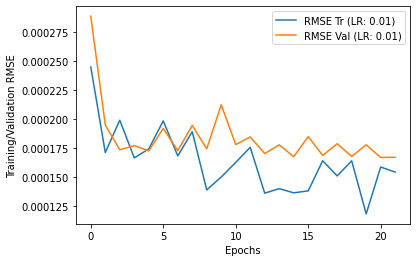

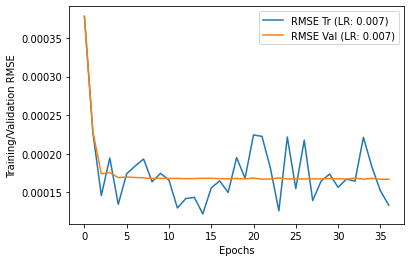

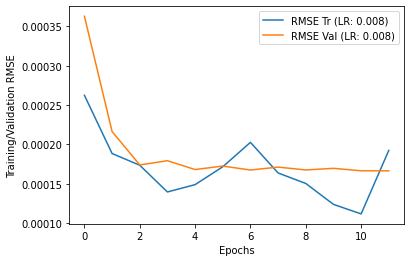

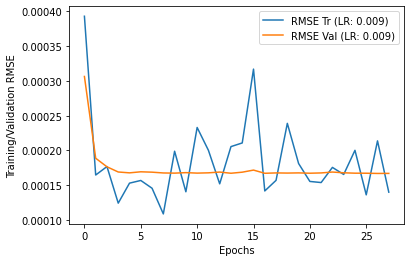

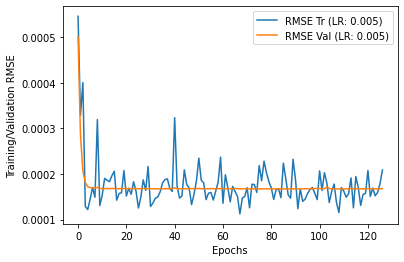

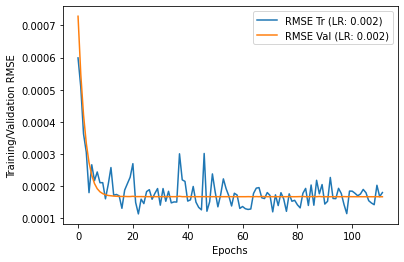

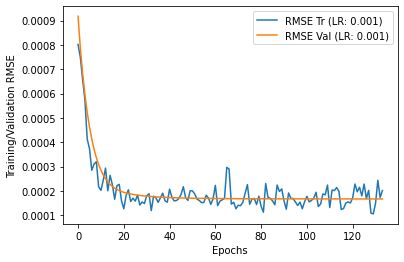

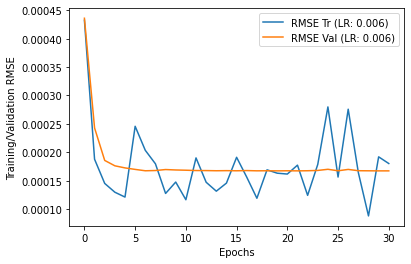

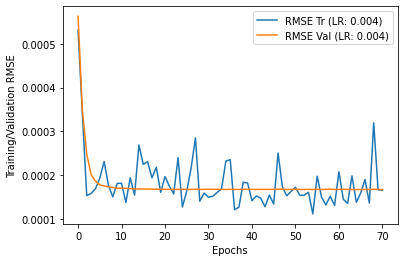

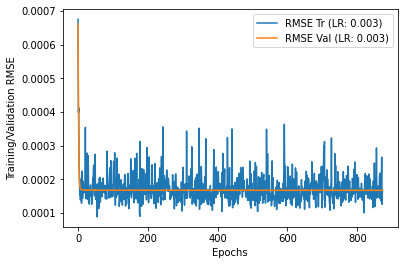

In [ ]:
lr = [0.01,0.007,0.008,0.009,0.005,0.002,0.001,0.006,0.004,0.003]
for i in range(len(ep)):
  plt.plot(list(range(0,ep[i])),rm_tr[i],label="RMSE Tr (LR: {})".format(lr[i]))
  plt.plot(list(range(0,ep[i])),rm_v[i],label="RMSE Val (LR: {})".format(lr[i]))
  plt.xlabel('Epochs')
  plt.ylabel('Training/Validation RMSE')
  plt.legend()
  plt.show()

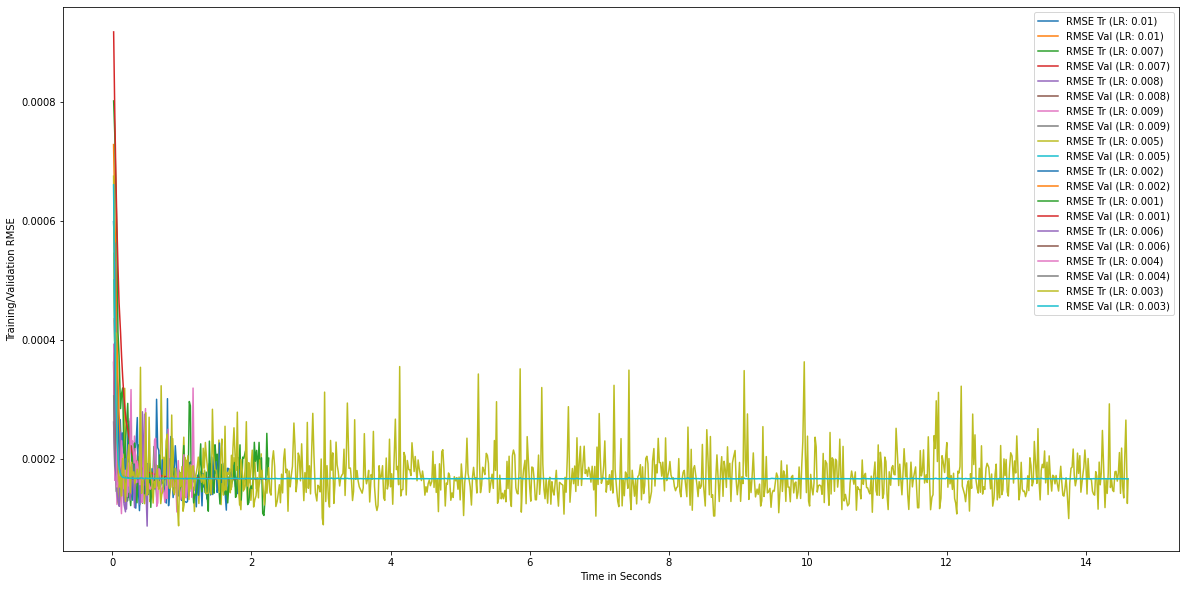

In [ ]:
lr = [0.01,0.007,0.008,0.009,0.005,0.002,0.001,0.006,0.004,0.003]
plt.figure(figsize=(20, 10))
for i in range(len(ep)):
  plt.plot(tm_ar[i],rm_tr[i],label="RMSE Tr (LR: {})".format(lr[i]))
  plt.plot(tm_ar[i],rm_v[i],label="RMSE Val (LR: {})".format(lr[i]))
plt.xlabel('Time in Seconds')
plt.ylabel('Training/Validation RMSE')
plt.legend()
plt.show()

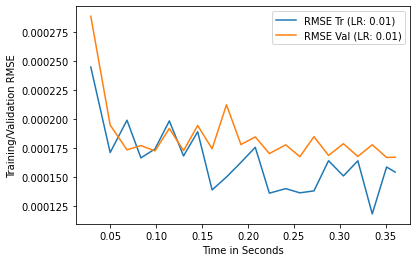

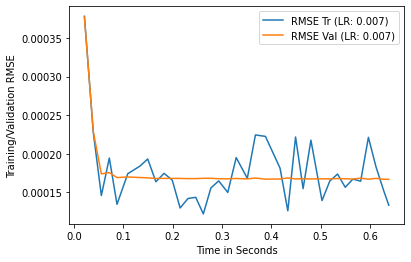

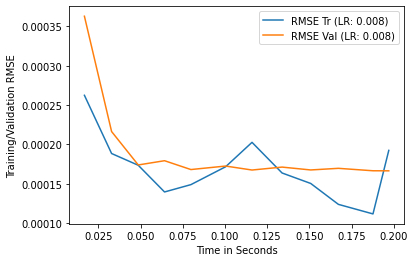

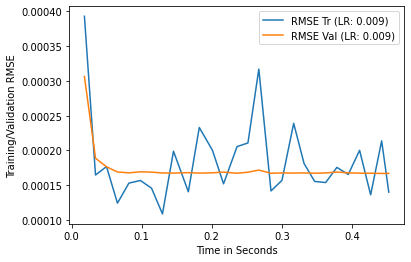

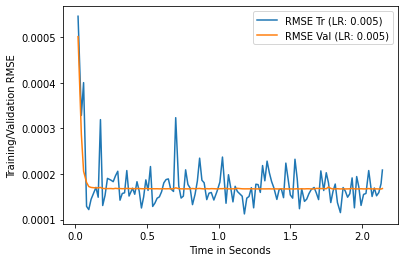

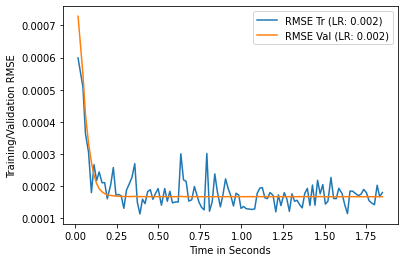

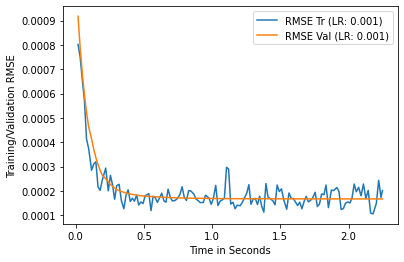

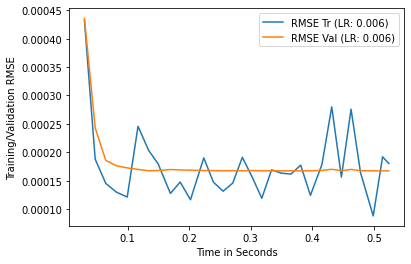

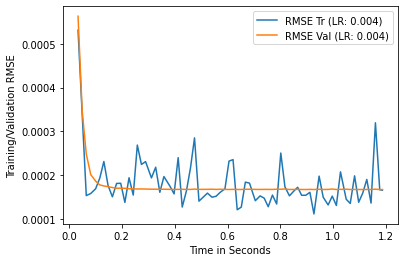

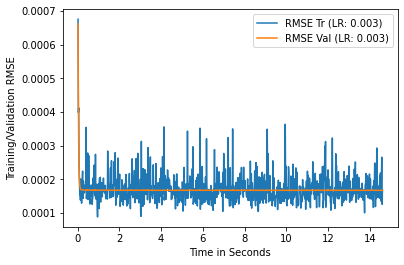

In [ ]:
lr = [0.01,0.007,0.008,0.009,0.005,0.002,0.001,0.006,0.004,0.003]
for i in range(len(ep)):
  plt.plot(tm_ar[i],rm_tr[i],label="RMSE Tr (LR: {})".format(lr[i]))
  plt.plot(tm_ar[i],rm_v[i],label="RMSE Val (LR: {})".format(lr[i]))
  plt.xlabel('Time in Seconds')
  plt.ylabel('Training/Validation RMSE')
  plt.legend()
  plt.show()

In [ ]:
train = []
valid = []
t = []
for i in range(len(rm_tr)):
  train.append(rm_tr[i][-1])
  valid.append(rm_v[i][-1])
  t.append(tm_ar[i][-1])

In [ ]:
bs = [64] *10
table1 = pd.DataFrame()
table1['batch_size'] = bs
table1['Learning Rate'] = lr
table1['RMSE Training'] = train
table1['RMSE Validation'] = valid
table1['Time Elapsed (Seconds)'] = t

In [ ]:
table1.head(10)

,batch_size,Learning Rate,RMSE Training,RMSE Validation,Time Elapsed (Seconds)
0,64,0.010,0.000154,0.000167,0.360296
1,64,0.007,0.000133,0.000167,0.638316
2,64,0.008,0.000192,0.000167,0.197009
3,64,0.009,0.000140,0.000167,0.452734
4,64,0.005,0.000209,0.000168,2.139904
5,64,0.002,0.000180,0.000167,1.848475
6,64,0.001,0.000202,0.000167,2.247938
7,64,0.006,0.000180,0.000167,0.524276
8,64,0.004,0.000166,0.000167,1.186017
9,64,0.003,0.000167,0.000167,14.609017


Dataset with a batch size of 64 with a learning rate of 0.01 converges the fastest (0.36 Seconds). We can also observe that with the decrease in batch size (for example - 8) the training error is much lower than than the validation error. This indicates that the model is overfitting.

## Part 6 - Finalizing a model


Finalizing the model: From the previous part we observed that the model with a mini batch size of 64 and a learning rate of 0.01 converges fastest. 

In [ ]:
w = (np.random.random(41)*0.0001).reshape(-1,1)
lr = 0.01
batch_size =64
final_1,epoch9, rmse_tr9,rmse_test,time_arr9,itr9 = mini_batchGD(X_train,y_train,X_test,y_test,w,lr,rmse_test,batch_size)

epoch: 6
Number of Batches(iterations/epoch): 151
--- Total Training Time: 0.20128321647644043 (s) ---


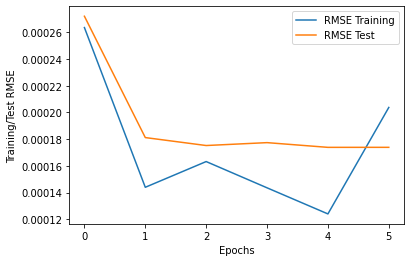

In [ ]:
plt.plot(list(range(0,epoch9)),rmse_tr9,label="RMSE Training")
plt.plot(list(range(0,epoch9)),rmse_test,label="RMSE Test ")
plt.xlabel('Epochs')
plt.ylabel('Training/Test RMSE')
plt.legend()
plt.show()

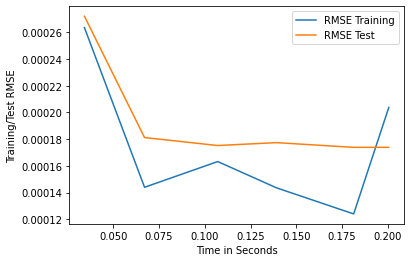

In [ ]:
plt.plot(time_arr9,rmse_tr9,label="RMSE Training")
plt.plot(time_arr9,rmse_test,label="RMSE Test ")
plt.xlabel('Time in Seconds')
plt.ylabel('Training/Test RMSE')
plt.legend()
plt.show()

Summary: 

  We have trained the model using 40 different features using the linear regression model with variations of full batch and mini batch gradient descend. Since full batch GD is not an efficient method to train large datasets, we use mini batch GD to predict the goal.

  In mini batch gradient descent, we find that the model does not converge for batch size less than 64 with learning rate of 0.01. But lesser batch sizes converges with lower learning rate as seen in part 5.

  With higher batch size, we see that the execution time increases with increase in the batch size, but eventually they converge.
We get the best results in terms of execution time for test set when the batch size is set to 64 with learning rate of 0.01 which converges in 0.20128321647644043 seconds.

## Part 7 - Getting started with Github

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. 

**Private Repository Link** : https://github.com/APS-1070-2021/project-4-gopi-196